In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

## Importamos los registros limpios y los exhibimos

In [2]:
df = pd.read_csv('Monitores Nuevos - Registros limpios - Mercado Libre Argentina - Agosto 2023.csv', index_col= 0)

# Números exhibidos como enteros redondos
pd.options.display.float_format = '{:.0f}'.format

df.head()

,Marca,Modelo,Tamaño de la pantalla,Tipo de resolución,Tipo de pantalla,Frecuencia de actualización,Precio,Link
0,Philips,271E1SCA/55,27,FHD,LCD,75,185999,https://www.mercadolibre.com.ar/monitor-gamer-...
1,Samsung,F24T35,24,FHD,LED,75,86999,https://www.mercadolibre.com.ar/monitor-gamer-...
2,Samsung,F22T35,22,FHD,LED,75,75999,https://www.mercadolibre.com.ar/monitor-gamer-...
3,Noblex,MK24X7100,24,FHD,LED,75,66990,https://www.mercadolibre.com.ar/monitor-led-no...
4,Philips,221V8,22,FHD,LCD,75,51499,https://www.mercadolibre.com.ar/monitor-gamer-...


In [3]:
'''df['Marca'].value_counts().plot.bar(figsize=(20,5))
df['Tamaño de la pantalla'].value_counts().plot.bar(figsize=(20,5),xlabel='Tamaño de la pantalla',ylabel='Frecuencia')
df['Tipo de resolución'].value_counts().plot.bar(figsize=(10,5))
df['Tipo de pantalla'].value_counts().plot.bar(figsize=(10,5))
df['Frecuencia de actualización'].value_counts().plot.bar(figsize=(10,5))
df.groupby('Marca').mean().sort_values(by='Precio', ascending=False).plot.bar(figsize=(20,10))
df[(df['Marca']!='Apple')].groupby('Marca').mean().sort_values(by='Precio', ascending=False).plot.bar(figsize=(20,10))
df.groupby('Marca').mean().sort_values(by='Precio', ascending=False)'''
print()

## Cantidad de registros:

In [4]:
print(len(df))

1240


## Presencia de cada marca en el sitio:

In [5]:
df['Marca'].value_counts()

LG              324
Samsung         297
Philips         138
ViewSonic        73
Asus             70
Acer             39
HP               37
Gigabyte         31
Dell             27
Level Up         26
BenQ             24
Daewoo           20
Gfast            20
Noblex           16
AOC              13
Redragon         12
MSI               7
Lenovo            6
iQual             6
HKC               5
JBMI              4
E-View            4
Westinghouse      4
BeOne             3
Noxido            3
CX                3
Hikvision         3
Apple             3
Gadnic            3
CHECKPOINT        2
Enova             2
Naxido            2
Etheos            2
HDC               1
G-FAST            1
Tedge             1
Suono             1
Ozone             1
Mtek              1
Sceptre           1
AOpen             1
NEC               1
Aorus             1
Viotek            1
Name: Marca, dtype: int64

## Rango de tamaños para monitores en el sitio:

In [6]:
tamaniosDeMonitorUnicos = list(df['Tamaño de la pantalla'].unique())
tamaniosDeMonitorUnicos.sort()
print('Tamaño más pequeño disponible:',tamaniosDeMonitorUnicos[0])
print('Tamaño más grande disponible:',tamaniosDeMonitorUnicos[len(tamaniosDeMonitorUnicos)-1])

Tamaño más pequeño disponible: 15.6
Tamaño más grande disponible: 49.0


## Rango de precios para monitores en el sitio:

In [7]:
preciosUnicos = list(df['Precio'].unique())
preciosUnicos.sort()
print('Precio más barato disponible:',preciosUnicos[0])
print('Precio más caro disponible: ARS',preciosUnicos[len(preciosUnicos)-1])

Precio más barato disponible: 37000
Precio más caro disponible: ARS 5999999


## Monitor o monitores con la mayor frecuencia de actualización del sitio:

In [8]:
frecuenciasUnicas = list(df['Frecuencia de actualización'].unique())
frecuenciasUnicas.sort(reverse = True)
df[(df['Frecuencia de actualización'] == frecuenciasUnicas[0])]

,Marca,Modelo,Tamaño de la pantalla,Tipo de resolución,Tipo de pantalla,Frecuencia de actualización,Precio,Link
94,Asus,PG259QNR,24,FHD,LED,360,479000,https://www.mercadolibre.com.ar/monitor-gamer-...
534,ViewSonic,XG251G,24,FHD,LED,360,461219,https://articulo.mercadolibre.com.ar/MLA-12043...
844,ViewSonic,XG251G,24,FHD,LED,360,622639,https://articulo.mercadolibre.com.ar/MLA-12036...


## Resolución de pantalla más común del sitio: FHD (Full High Definition)

<AxesSubplot:>

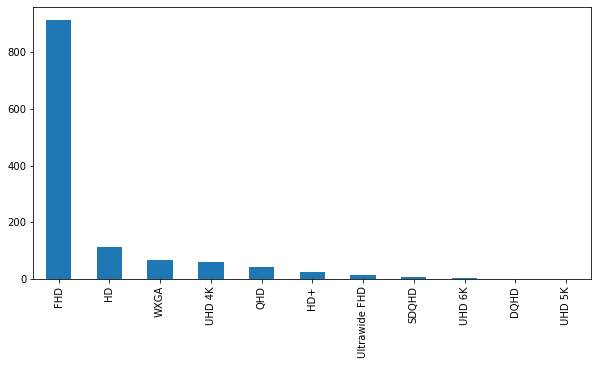

In [9]:
df['Tipo de resolución'].value_counts().plot.bar(figsize=(10,5))

## Tipos de pantalla disponibles y su cantidad:

In [10]:
df['Tipo de pantalla'].value_counts()

LED        1060
LCD         157
LCD TFT       8
LCD/LED       7
LED IPS       4
LED VA        3
QLED          1
Name: Tipo de pantalla, dtype: int64

## Los tres monitores más caros del sitio:

<p>Todos coinciden con la marca Apple. Tienen resoluciones UHD (Ultra High Definition) entre 5K y 6K. Y sus precios van entre 5 y s</p>

In [11]:
df.sort_values(by='Precio', ascending = False).head(3)

,Marca,Modelo,Tamaño de la pantalla,Tipo de resolución,Tipo de pantalla,Frecuencia de actualización,Precio,Link
1611,Apple,XDR NANO,32,UHD 6K,LED,47,5999999,https://articulo.mercadolibre.com.ar/MLA-11874...
1672,Apple,XDR STANDARD,32,UHD 6K,LED,47,5599999,https://articulo.mercadolibre.com.ar/MLA-11874...
1673,Apple,XDR NANO,27,UHD 5K,LED,47,4999999,https://articulo.mercadolibre.com.ar/MLA-11000...
